# Generative Adversarial Networks Fundamentals

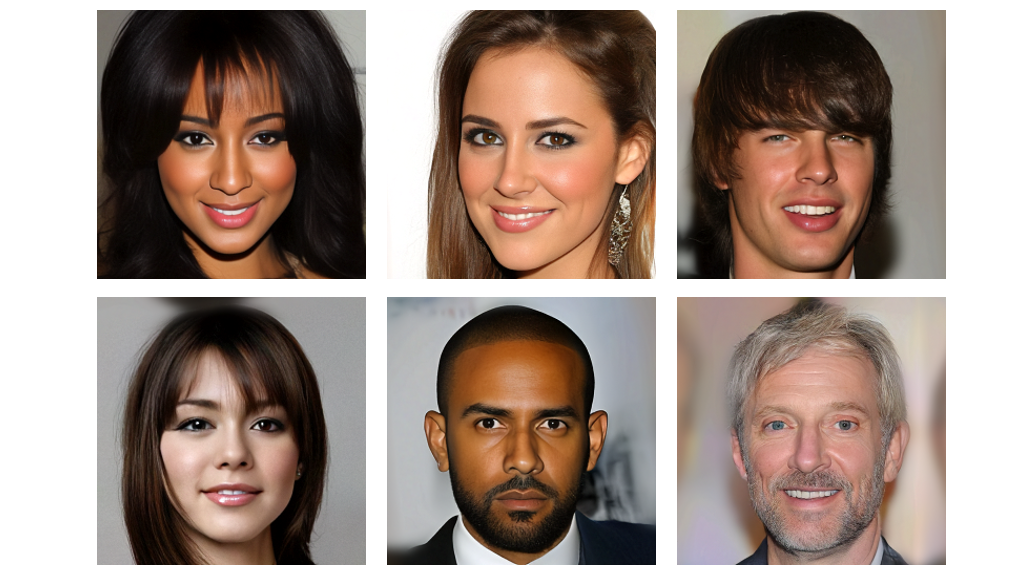

Generative Adversarial Networks (GANs) have brought about a revolutionary storm in the machine learning (ML) community. They, to some extent, have changed the way people solve practical problems in Computer Vision (CV) and Natural Language Processing (NLP).

Before we start exploiting the new features in PyTorch, we will first learn to build a simple GAN with NumPy to generate sine signals so that you may have a profound understanding of the mechanism beneath GANs.

# Machine learning – classification and generation

ML is the study of recognizing patterns from data without hardcoded rules given by humans. The recognizing of patterns (**Pattern Recognition** or **PR**) is the automatic discovering of the similarities and differences among raw data, which is an essential way to realize **Artificial Intelligence** (**AI**) that only exists in novels and movies.

Although it is hard to tell when exactly real AI will come to birth in the future, the development of ML has given us much confidence in recent years. ML has already been vastly used in many fields, such as CV, NLP, recommendation systems, Intelligent Transportation Systems (ITS), medical diagnoses, robotics, and advertising.

A ML model is typically described as a system that takes in data and gives certain outputs based on the parameters it contains. The **learning** of the model is actually adjusting the parameters to get better outputs (a.k.a. parametric learning).

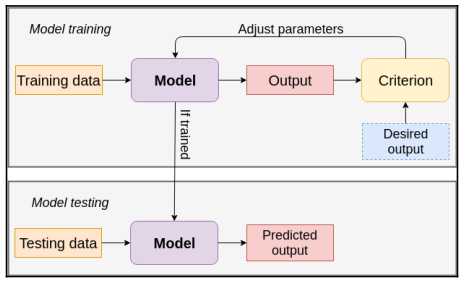

We then use one or several criteria to measure the output, to tell how well our model performs. In this step, a set of desired outputs (or ground truth) with respect to the training data would be very helpful. If ground truth data is used in training, this process is often called supervised learning. If not, it is often regarded as unsupervised learning.
_____
A parametric model is characterized by having a fixed number of parameters, whereas a nonparametric model’s number of parameters is infinite (determined by data).

We constantly adjust the model's parameters based on its performance (in other words, whether it gives us the results we want) so that it yields better results in the future. This process is called model training. The training of a model takes as long as it pleases us. Typically, we stop the training after a certain number of iterations (epochs) or when the performance is good enough.

What types of problems this model can solve is essentially determined by the types of input and output data we want. For example, a classification model takes an input of any number of dimensions (audio, text, image, or video) and gives a 1-dimension output (single values indicating the predicted labels).

A generative model typically takes a 1-dimension input (a latent vector) and generates high-dimension outputs (images, videos, or 3D models). It maps low-dimensional data to high-dimensional data, at the same time, trying to make the output samples look as convincing as possible.

# Introducing adversarial learning

Traditionally, generative problems are solved by statistics-based methods such as a Boltzmann machine, Markov chain, or variational encoder. As mathematically profound as they are, the generated samples are as of yet far from perfect.

A classification model maps high-dimension data to low-dimension, while a generative model often maps low-dimension data to high-dimension ones.

Can we get the two different models to work against each other and improve themselves at the same time?

gan.svg

If we take the output of a generative model as the input of the classification model, we can measure the performance of the generative model (the armor) with the classification model (the sword). At the same time, we can improve the classification model (the sword) by feeding generated samples (the armor) along with real samples, since we can agree that more data is often better for the training of ML models.

The training process where the two models try to weaken each other and, as a result, improve each other is called adversarial learning.

GANs are designed based on this very idea, which was proposed by Goodfellow, Pouget Abadie, Mirza, et al in 2014. Now, GANs have become the most thriving and popular method to synthesize audio, text, images, video, and 3D models in the ML community. In this book, we will walk you through the basic components and mechanisms of different types of GANs and learn how to use them to address various practical problems. In the next section, we will introduce the basic structure of GANs to show you how and why they work so well.

# Generator and discriminator networks

A typical structure of a GAN contains two different networks: a **generator** network and a **discriminator** network. The **generator** network typically takes random noises as input and generates fake samples. Our goal is to let the fake samples be as close to the real samples as possible. That's where the **discriminator** comes in. The **discriminator** is, in fact, a classification network, whose job is to tell whether a given sample is fake or real.

The generator tries its best to trick and confuse the discriminator to make the wrong decision, while the discriminator tries its best to distinguish the fake samples from the real ones.

In this process, the differences between fake and real samples are used to improve the generator. Therefore, the generator gets better at generating realistic-looking samples while the discriminator gets better at picking them out. Since real samples are used to train the discriminator, the training process is therefore supervised. Even though the generator always gives fake samples without the knowledge of ground truth, the overall training of GAN is still **supervised**

Typically, the discriminator outputs a scalar prediction $o \in \mathbb{R}$  for a given input, such as using a dense layer with hidden size 1, and then applies sigmoid function to obtain the predicted probability $D(\mathbf x) = 1/(1+e^{-o})$. Assume the label $y$ for the true data is 1 and 0 for the fake data. We train the discriminator to minimize the cross-entropy loss, i.e.,

$$\min_D \{ - y \log D(\mathbf x) - (1-y)\log(1-D(\mathbf x)) \} $$

For the generator, it first draws some parameter $\bf{z}\in \mathbb{R}^d$ from a source of randomness, e.g., a normal distribution $\bf{z} \sim \mathbb{N}(0,1)$. We often call $\bf{z}$ as the latent variable. It then applies a function to generate $x` = G(\bf{z})$. The goal of the generator is to fool the discriminator to classify $x` = G(\bf{z})$ as true data, i.e., we want $D(G(\bf{z})) \approx 1$. In other words, for a given discriminator $D$, we update the parameters of the generator $G$ to maximize the cross-entropy loss when $y=0$, i.e.,


$$\max_G \{ - (1-y) \log(1-D(G(\mathbf z))) \} = \max_G \{ - \log(1-D(G(\mathbf z))) \}$$


If the generator does a perfect job, then $D(\mathbf x')\approx 1$ so the above loss near 0, which results the gradients are too small to make a good progress for the discriminator. So commonly we minimize the following loss:

$$\min_G \{ - y \log(D(G(\mathbf z))) \} = \min_G \{ - \log(D(G(\mathbf z))) \}$$

which is just feed $\mathbf x'=G(\mathbf z)$ into the discriminator but giving label.

To sum up, $D$ and $G$ are playing a “minimax” game with the comprehensive objective function:

$$min_D max_G \{ -E_{x \sim \text{Data}} log D(\mathbf x) - E_{z \sim \text{Noise}} log(1 - D(G(\mathbf z))) \}$$

In [ ]:
import numpy as np
import torch
from torch import nn
import matplotlib.pyplot as plt

# Generate Some “Real” Data

In [ ]:
X = torch.normal(0., 1., (1000, 2))
A = torch.tensor([[1, 2], [-0.1, 0.5]])
b = torch.tensor([1, 2])
data = torch.matmul(X, A) + b

The covariance matrix is 
 tensor([[1.0100, 1.9500],
        [1.9500, 4.2500]])


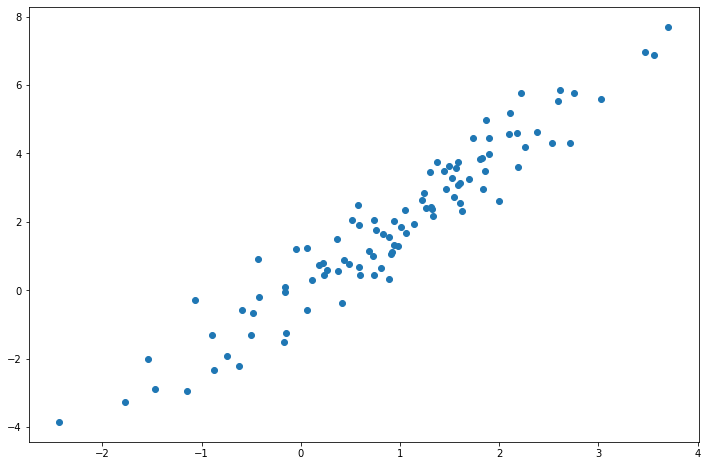

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(data[:100, 0].detach().numpy(), data[:100, 1].detach().numpy())
print(f'The covariance matrix is \n {torch.matmul(A.T, A)}')

In [ ]:
from torch.utils.data import DataLoader

In [ ]:
batch_size = 8
dtl = DataLoader(data,  batch_size=batch_size, num_workers=8, pin_memory=True)

In [ ]:
ob = next(iter(dtl))

In [ ]:
ob.shape

torch.Size([8, 2])

# Generator

Our generator network will be the simplest network possible - a single layer linear model. This is since we will be driving that linear network with a Gaussian data generator. Hence, it literally only needs to learn the parameters to fake things perfectly.

In [ ]:
net_G = nn.Sequential(nn.Linear(2,2))

# Discriminator

For the discriminator we will be a bit more discriminating: we will use an MLP with 3 layers to make things a bit more interesting.

In [ ]:
net_D = nn.Sequential(
    nn.Linear(2, 5),
    nn.Tanh(),
    nn.Linear(5,3),
    nn.Tanh(),
    nn.Linear(3,1)
)

# Training

In [ ]:
def update_D(X, Z, net_D, net_G, loss, trainer_D):
    '''Update discriminator'''
    batch_size = X.shape[0]
    ones = torch.ones((batch_size,), device=X.device)
    zeros = torch.zeros((batch_size,), device=X.device)
    trainer_D.zero_grad()
    real_Y = net_D(X)
    fake_X = net_G(Z)
    #No need to compute gradient for 'net_G'; detach it from the gradient computing
    fake_Y = net_D(fake_X.detach())
    loss_D = (loss(real_Y, ones.reshape(real_Y.shape)) + 
              loss(fake_Y, zeros.reshape(fake_Y.shape)))/2
    loss_D.backward()
    trainer_D.step()
    return loss_D

The generator is updated similarly. Here we reuse the cross-entropy loss but change the label of the fake data from  0 to 1.

In [ ]:
def update_G(Z, net_D, net_G, loss, trainer_G):
    '''update generator'''
    batch_size = Z.shape[0]
    ones = torch.ones((batch_size,), device=Z.device)
    trainer_G.zero_grad()
    #we could reuse 'fake_X' from update_D
    fake_X = net_G(Z)
    #recomputing 'fake_Y' since 'net_D' changed
    fake_Y = net_D(fake_X)
    loss_G = loss(fake_Y, ones.reshape(fake_Y.shape))
    loss_G.backward()
    trainer_G.step()
    return loss_G

Both the discriminator and the generator performs a binary logistic regression with the cross-entropy loss. We use Adam to smooth the training process. In each iteration, we first update the discriminator and then the generator. We visualize both losses and generated examples.

In [ ]:
len(dtl.dataset)

1000

In [ ]:
def train(net_D, net_G, dataloader, num_epochs, lr_D, lr_G, latent_dim, data):
    loss = nn.BCEWithLogitsLoss(reduction='sum')
    for w in net_D.parameters():
        nn.init.normal_(w, 0, 0.02)
    for w in net_G.parameters():
        nn.init.normal_(w, 0, 0.02)
        
    trainer_D = torch.optim.Adam(net_D.parameters(), lr=lr_D)
    trainer_G = torch.optim.Adam(net_G.parameters(), lr=lr_G)
    G_loss_hst = {}
    D_loss_hst = {}
    for epoch in range(num_epochs):
        #train epoch
        for X in dataloader:
            batch_size = X.shape[0]
            Z = torch.normal(0, 1, size=(batch_size, latent_dim))
            D_loss_hst[epoch] = update_D(X, Z, net_D, net_G, loss, trainer_D)
            G_loss_hst[epoch] = update_G(Z, net_D, net_G, loss, trainer_G)
        #visualize sample
        Z = torch.normal(0, 1, size=(100, latent_dim))
        fake_X = net_G(Z).detach().numpy()
        fig, ax = plt.subplots(figsize=(12,8))
        ax.scatter(fake_X[:,0], fake_X[:,1], label='fake data')
        ax.scatter(data[:,0], data[:,1], label='real data')
        ax.set_title(f'current loss G: {G_loss_hst[epoch]/len(dataloader.dataset):.3f}, loss D: {D_loss_hst[epoch]/len(dataloader.dataset):.3f}')
        ax.legend()
    return G_loss_hst, D_loss_hst

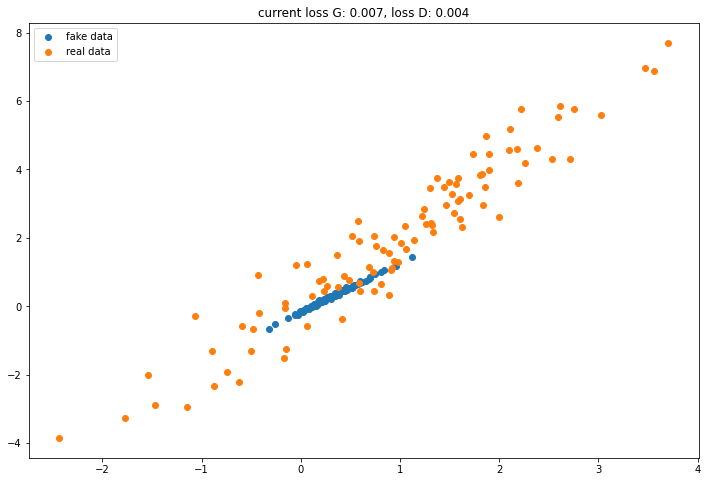

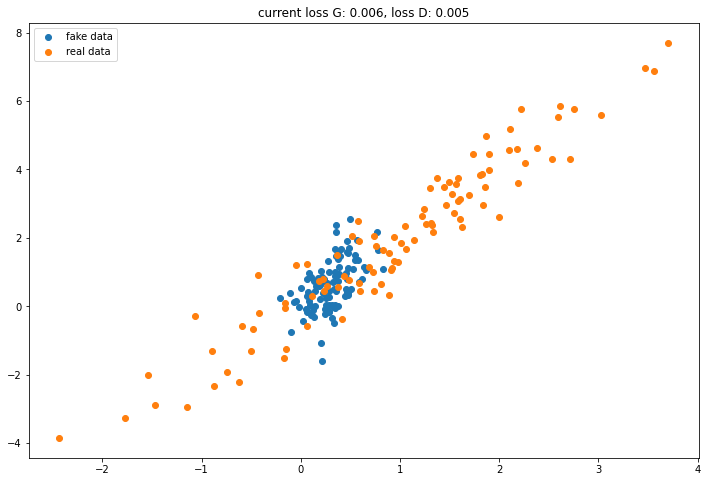

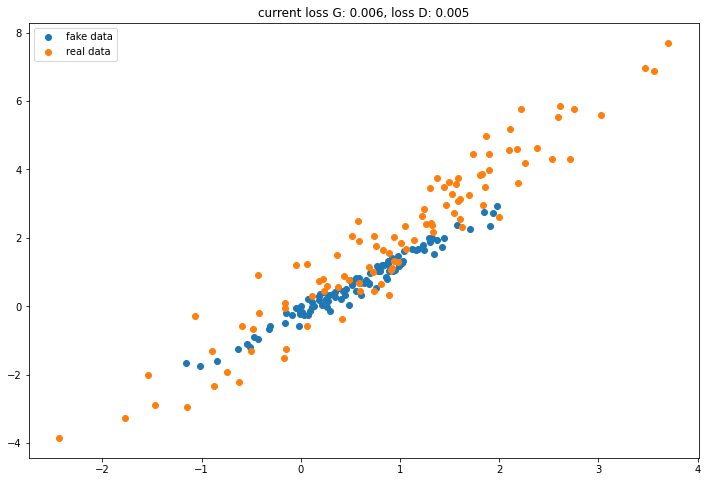

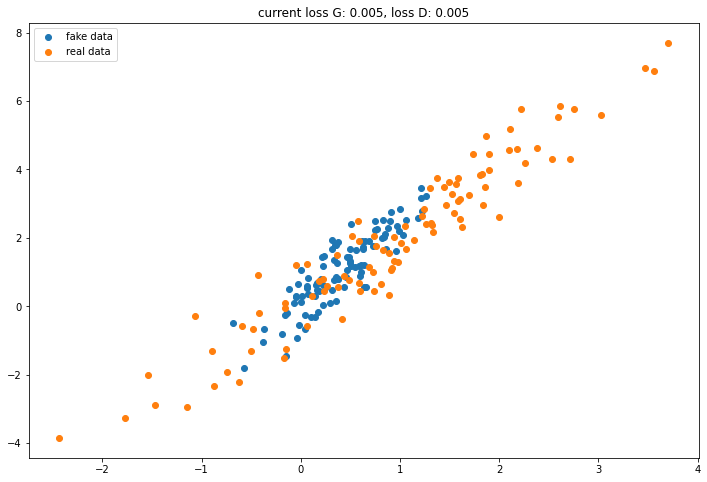

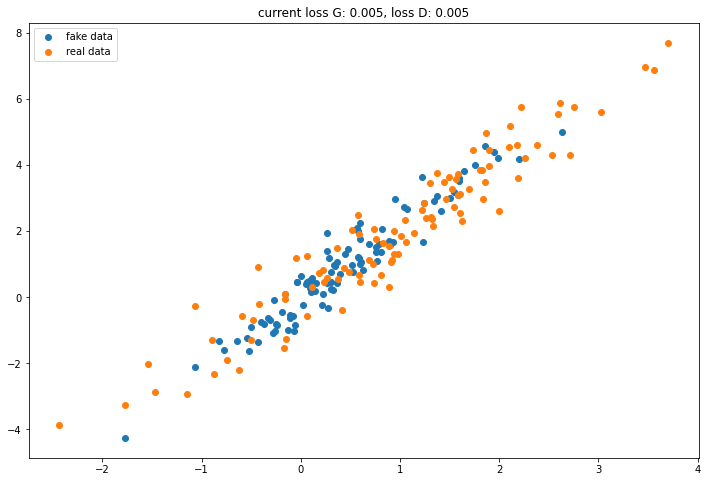

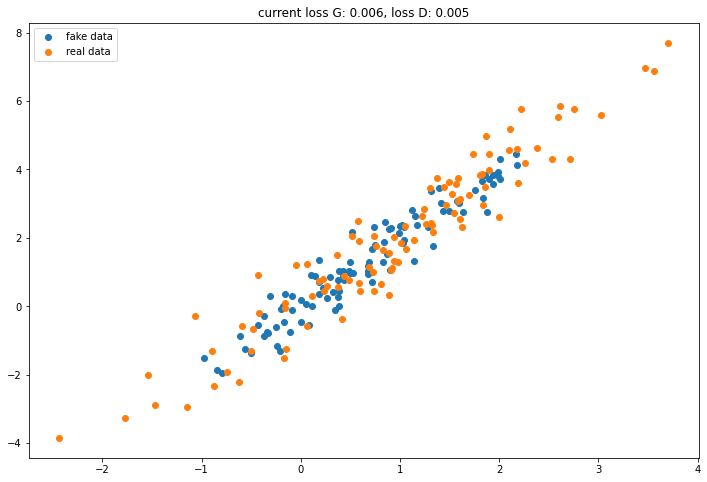

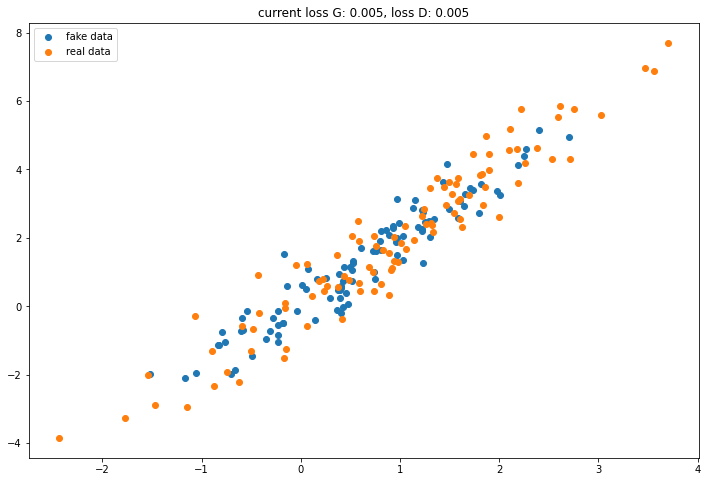

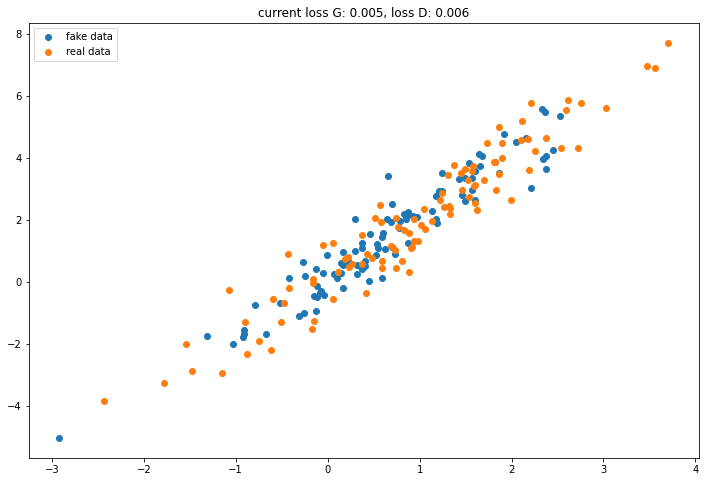

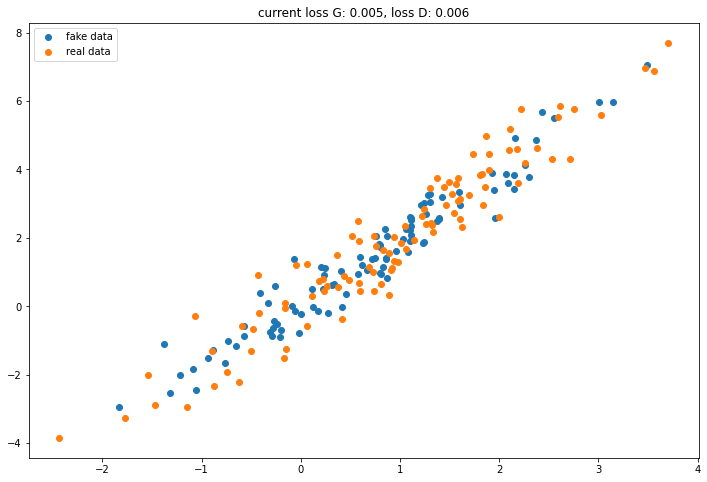

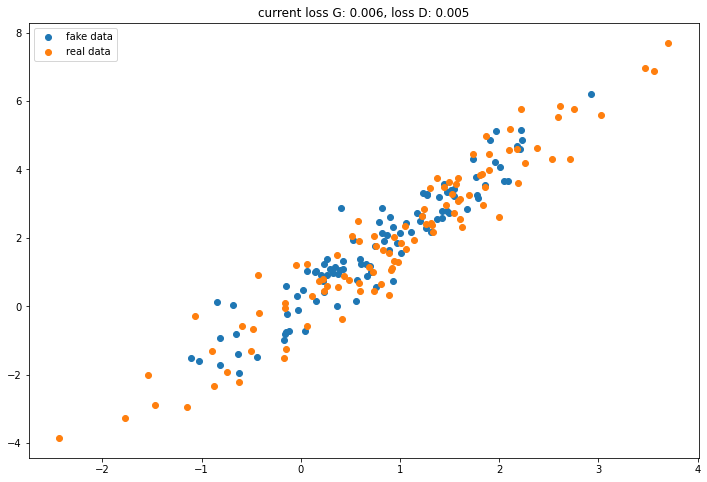

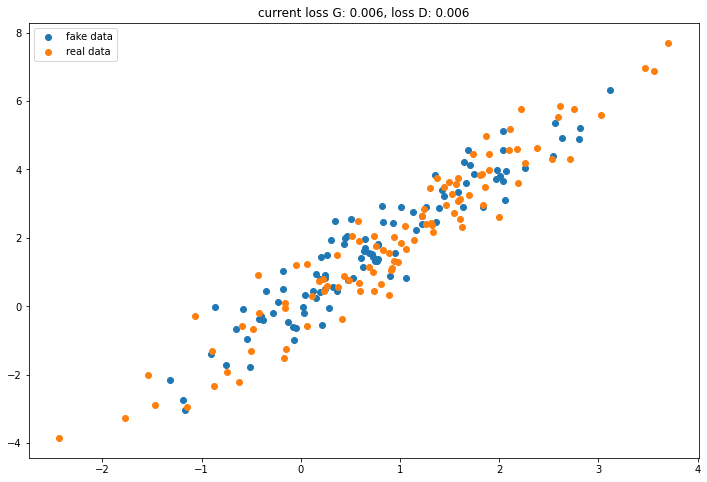

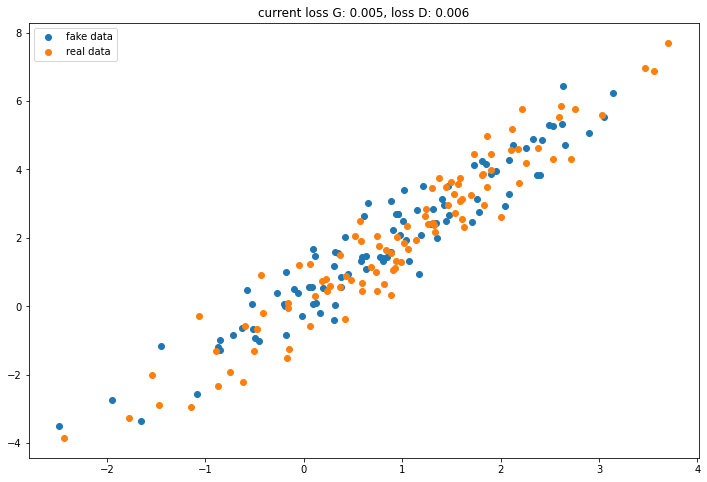

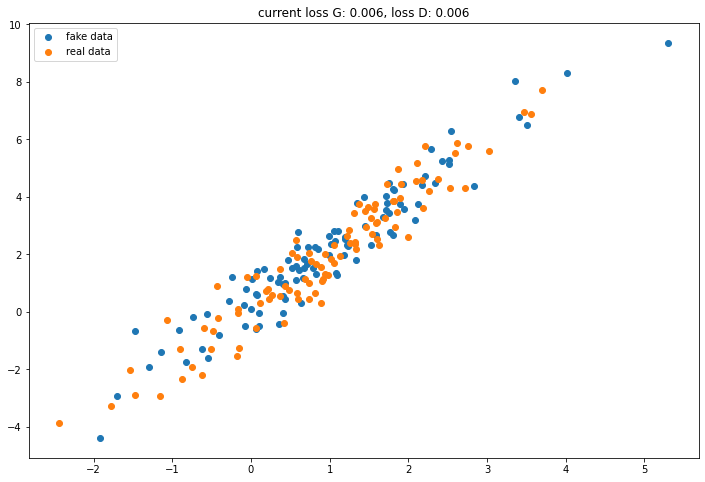

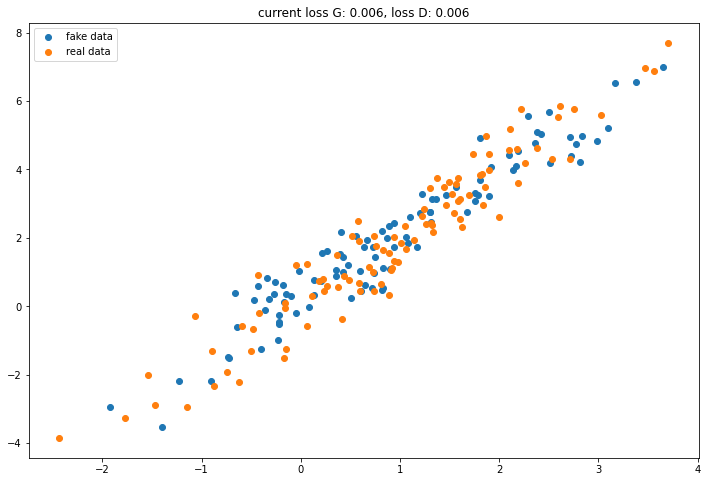

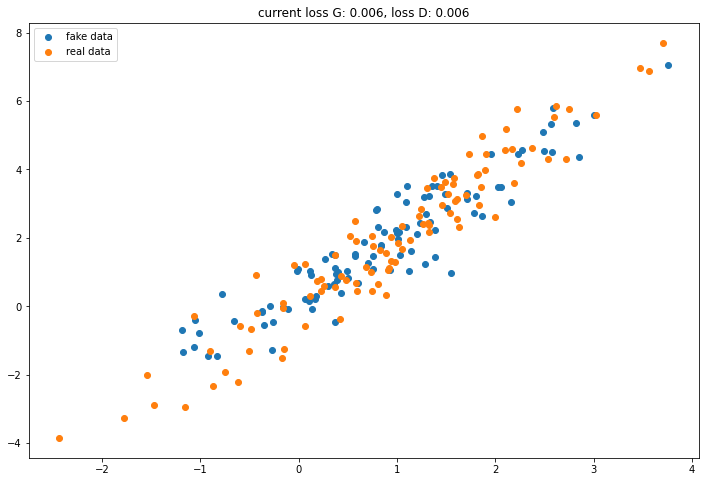

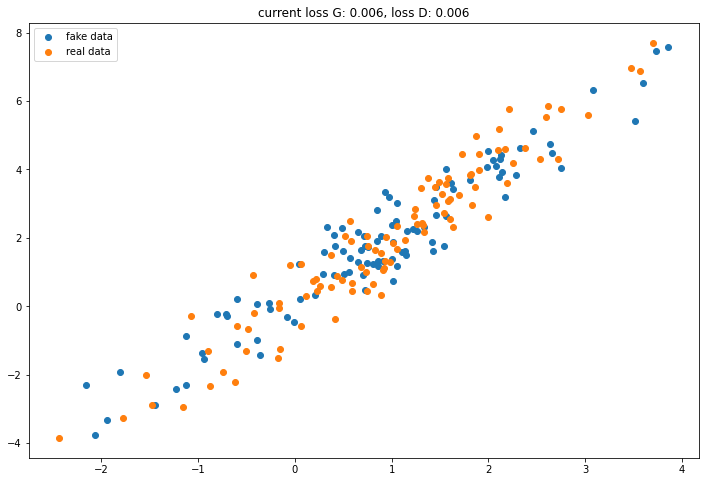

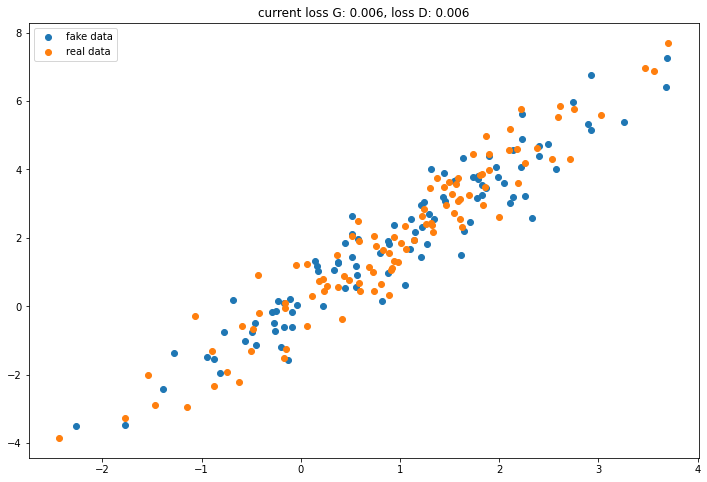

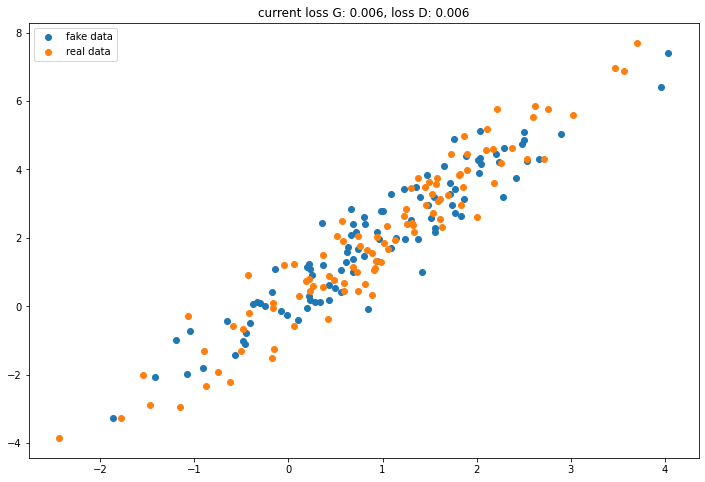

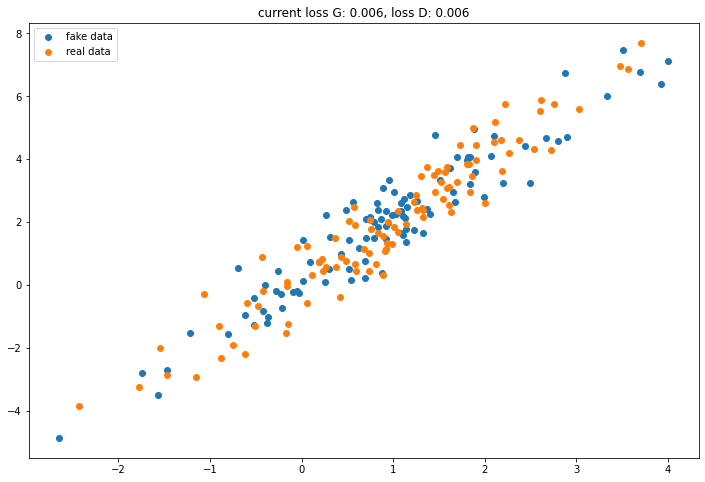

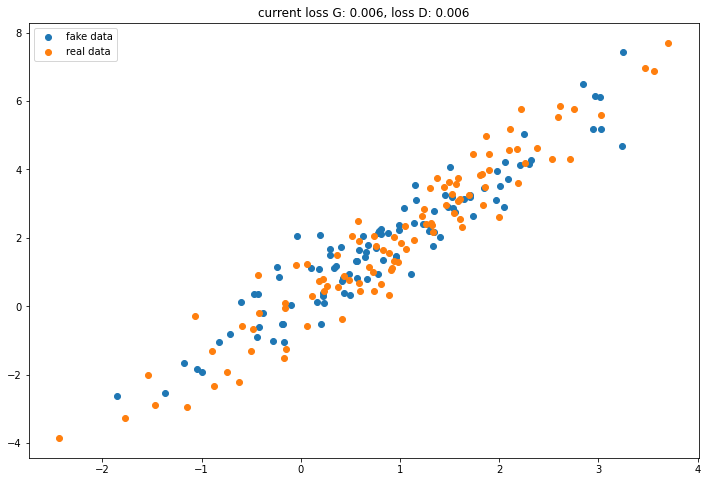

In [ ]:
lr_D, lr_G, latent_dim, num_epochs = 0.05, 0.005, 2, 20
ghist, dhistory = train(net_D, net_G, dtl, num_epochs, lr_D, lr_G, latent_dim, data[:100].detach().numpy())

<matplotlib.legend.Legend>

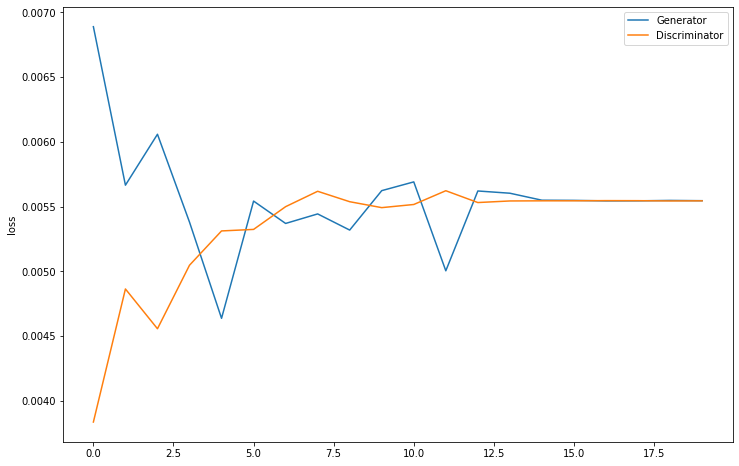

In [ ]:
plt.figure(figsize=(12,8))
plt.plot([i.item()/1000 for i in ghist.values()], label='Generator')
plt.plot([i.item()/1000 for i in dhistory.values()], label='Discriminator')
plt.ylabel('loss')
plt.legend(loc='best')

# Summary

- Generative adversarial networks (GANs) composes of two deep networks, the generator and the discriminator.

- The generator generates the image as much closer to the true image as possible to fool the discriminator, via maximizing the cross-entropy loss, i.e., $\max \log(D(\mathbf{x'}))$

- The discriminator tries to distinguish the generated images from the true images, via minimizing the cross-entropy loss, i.e., $\min - y \log D(\mathbf{x}) - (1-y)\log(1-D(\mathbf{x}))$